In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import seaborn as sns

In [5]:
df = pd.read_csv(r"E:\Gymcode\DA\DAP2304R1\Data\OnlineRetail.csv",encoding="ISO-8859-1")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [38]:
# chuyen doi ding dang float sang object
df['CustomerID'] = df['CustomerID'].astype(str)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

# Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao?
Không nên xoá hết các dòng chứa dữ liệu khuyết thiếu vì Custommer ID cũng không thực sự cần thiết trong việc phân tích dữ liệu và lượng dữ liệu bị xoá sẽ lớn chiếm tới 25% của bộ dữ liệu

In [40]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


# Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

In [17]:
df['Description']=df['Description'].fillna(value="Khong biet")
df['CustomerID']=df['CustomerID'].fillna(value=0)

In [18]:
df.isnull().sum()/df.shape[0]*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

# Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice

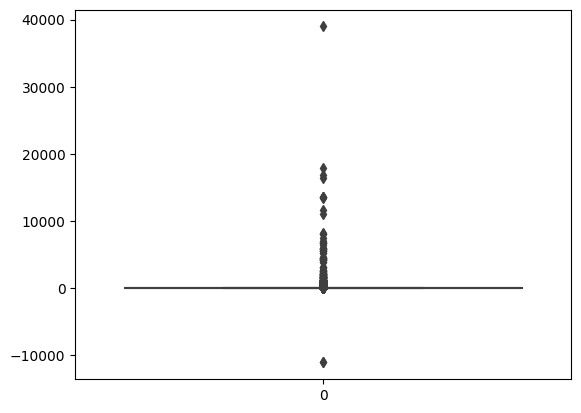

In [36]:
sns.boxplot(data = df['UnitPrice'])
plt.show()

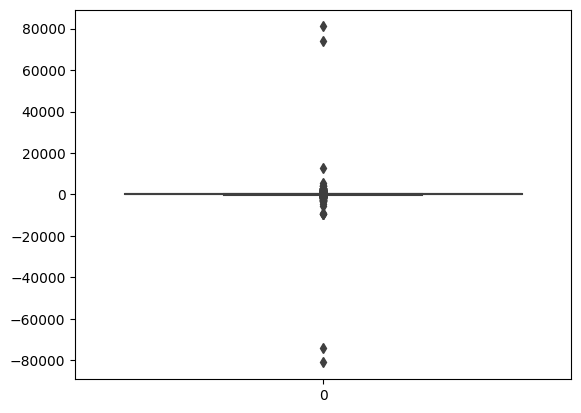

In [35]:
sns.boxplot(data = df['Quantity'])
plt.show()

In [37]:
# Sử lý giá trị ngoại lai: Giá trị ngoại lai của thuộc tính Quantity chứa giá trị <0, giá trị ngoại lai của UnitPrice =0

In [65]:
df3 = df[(df['Quantity']>0) | (df['UnitPrice']!=0)]
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch

In [66]:
# lọc dữ liệu sach
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540573 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    540573 non-null  object 
 1   StockCode    540573 non-null  object 
 2   Description  540573 non-null  object 
 3   Quantity     540573 non-null  int64  
 4   InvoiceDate  540573 non-null  object 
 5   UnitPrice    540573 non-null  float64
 6   CustomerID   540573 non-null  object 
 7   Country      540573 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 37.1+ MB


In [67]:
#Du lieu ngoai lai
df4 = df[~((df['Quantity']>0) | (df['UnitPrice']!=0))]
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,Khong biet,-10,12/1/2010 16:50,0.0,0.0,United Kingdom
4347,536764,84952C,Khong biet,-38,12/2/2010 14:42,0.0,0.0,United Kingdom
7188,536996,22712,Khong biet,-20,12/3/2010 15:30,0.0,0.0,United Kingdom
7189,536997,22028,Khong biet,-20,12/3/2010 15:30,0.0,0.0,United Kingdom
7190,536998,85067,Khong biet,-6,12/3/2010 15:30,0.0,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,12/7/2011 18:36,0.0,0.0,United Kingdom
535335,581212,22578,lost,-1050,12/7/2011 18:38,0.0,0.0,United Kingdom
535336,581213,22576,check,-30,12/7/2011 18:38,0.0,0.0,United Kingdom
536908,581226,23090,missing,-338,12/8/2011 9:56,0.0,0.0,United Kingdom


# Mô tả thông tin của bộ dữ liệu trên và nhận xét

In [68]:
df3.describe()

,Quantity,UnitPrice
count,540573.000000,540573.000000
mean,9.958705,4.622510
std,216.229554,96.879076
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [69]:
df4.describe()

,Quantity,UnitPrice
count,1336.000000,1336.0
mean,-154.907934,0.0
std,588.292456,0.0
min,-9600.000000,0.0
25%,-84.000000,0.0
50%,-30.000000,0.0
75%,-8.000000,0.0
max,-1.000000,0.0


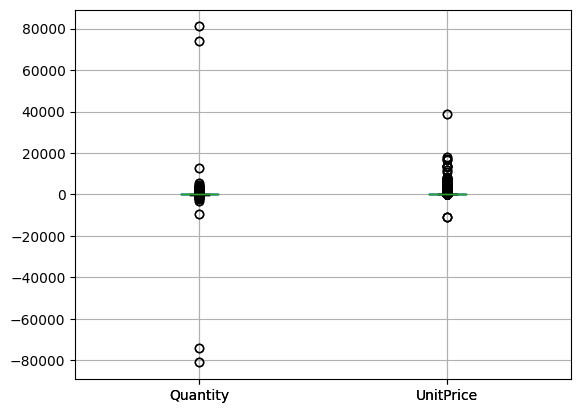

In [71]:
df3.boxplot()
plt.show()